# Practice Session 06: Network models


<font size="+2" color="blue">Additional results: fitting of power-law</font>

Author: <font color="blue">**Telmo Linacisoro**</font>

E-mail: <font color="blue">**telmomaximlian.linacisoro01@estudiant.upf.edu**</font>

Date: <font color="blue">**10/11/2024**</font>

# 1. Random (ER) graph generator

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

In [2]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

In [3]:
import random

def generate_random_graph(N, p):
    # Create an empty graph with N nodes numbered from 0 to N-1
    g = nx.Graph()
    g.add_nodes_from(range(N))

    # Iterate over all pairs of nodes (u, v) in the graph
    for u, v in itertools.combinations(g.nodes, 2):
        # For each pair, decide whether to add an edge between them based on probability p
        if random.random() < p:
            # Add an edge between nodes u and v if the random number is less than p
            g.add_edge(u, v)

    return g

In [4]:
N = 10
p = 0.3
trials = 1000
observed_edges = []

for _ in range(trials):
    g = generate_random_graph(N, p)
    observed_edges.append(g.number_of_edges())

expected_edges = p * N * (N - 1) / 2

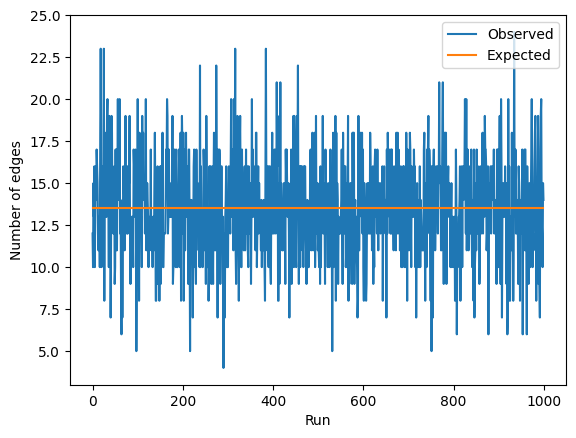

In [5]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

In [6]:
def generate_random_graph_avg_degree(N, kavg):
    p = kavg / (N - 1)
    return generate_random_graph(N, p)

In [7]:
def frange(start, stop, step):
    while start < stop:
        yield round(start, 1)
        start += step

def graph_average_degree(g):
    return sum(dict(g.degree()).values()) / g.number_of_nodes()

N = 3000
target_average_degrees = [round(k, 1) for k in frange(0.0, 3.0, 0.1)]
observed_average_degrees = []

for kavg in target_average_degrees:
    g = generate_random_graph_avg_degree(N, kavg)
    observed_average_degrees.append(graph_average_degree(g))

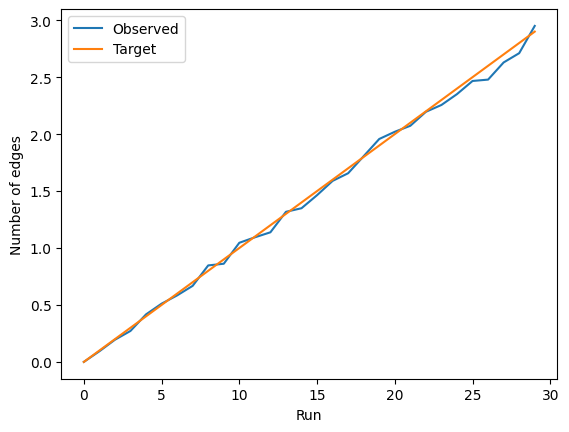

In [8]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(len(target_average_degrees)), observed_average_degrees, label="Observed")
plt.plot(range(len(target_average_degrees)), target_average_degrees, label="Target")
plt.legend()
plt.show()

## 1.2. Measure connectivity


In [9]:
def is_connected(g):
    for u, v in itertools.combinations(g.nodes, 2):
        if not nx.has_path(g, u, v):
            return False
    return True

In [10]:
# Leave as-is

def size_largest_cc(G):

    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])

    # Returns its number of nodes
    return G0.number_of_nodes()

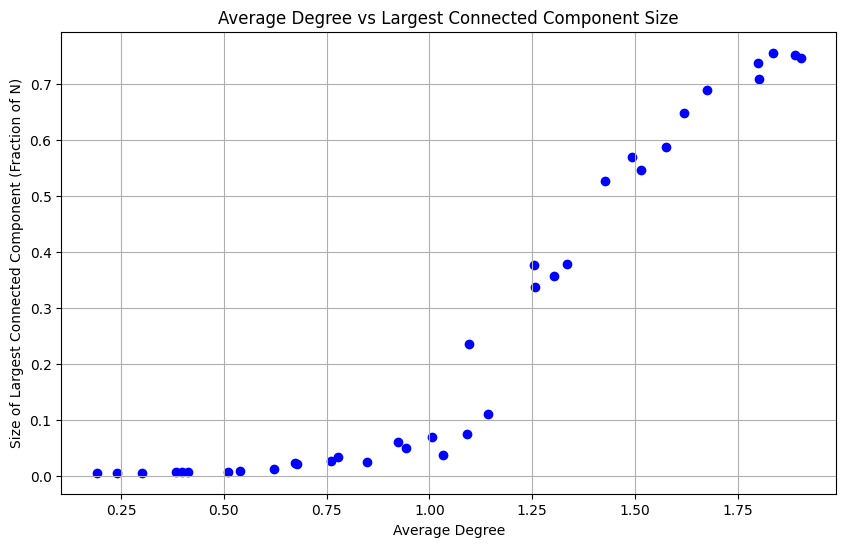

In [11]:
N = 1000
target_average_degrees = np.arange(0.2, 2.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:

    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"

    average_degree = graph_average_degree(g)
    average_degrees.append(average_degree)

    largest_cc_size = size_largest_cc(g) / N
    largest_cc_sizes.append(largest_cc_size)

plt.figure(figsize=(10, 6))
plt.scatter(average_degrees, largest_cc_sizes, color='blue', marker='o')
plt.xlabel('Average Degree')
plt.ylabel('Size of Largest Connected Component (Fraction of N)')
plt.title('Average Degree vs Largest Connected Component Size')
plt.grid(True)
plt.show()

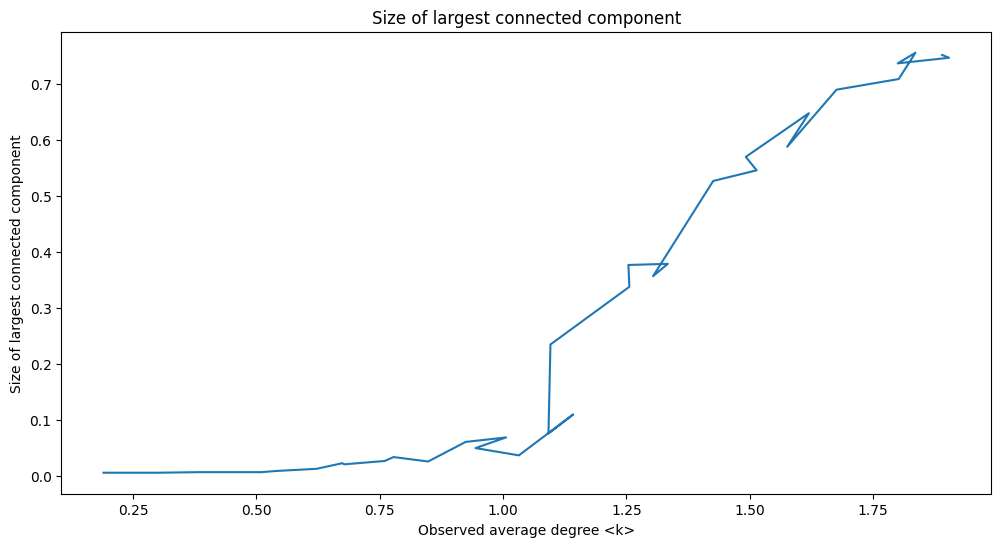

In [12]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.plot(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

<font size="+1" color="red">**Answer the following questions.**</font>

<font size="+1" color="red">**(1) At which average degree does the theory say that the size of the largest connected component should increase?**</font>

<font size="+1" color="red">In a random graph, the size of the largest connected component begins to emerge and increase rapidly once the average degree ⟨𝑘⟩ crosses 1. This threshold at ⟨𝑘⟩=1 is known as the percolation threshold. Below this threshold, the graph is likely composed of small disconnected clusters, whereas above this threshold, a large, connected component forms and grows.</font>

<font size="+1" color="red">**(2) At which average degree does it increase in this particular case?**</font>

<font size="+1" color="red">From the plot, it appears that the size of the largest connected component begins to increase noticeably at an average degree of around 1.0 to 1.2. This is reasonably aligned with the theoretical expectation, but with some fluctuations depending on the execution.</font>

<font size="+1" color="red">**(3) Why is the resulting curve not a function (specifically, why is it not univalent)?**</font>

<font size="+1" color="red">Because of stochastic variations in the random graph generation process. Since each graph is generated randomly, the exact size of the largest connected component can vary slightly even for the same average degree. These variations happen because, at smaller average degrees, the formation of connections and clusters can differ each time a graph is generated.</font>

<font size="+1" color="red">Additionally, this randomness is more noticeable near the percolation threshold (around ⟨𝑘⟩=1), where the network structure has a rapid transition, making it more sensible to slight changes in connectivity.</font>

## 1.3. Visualize graphs and plot degree distributions

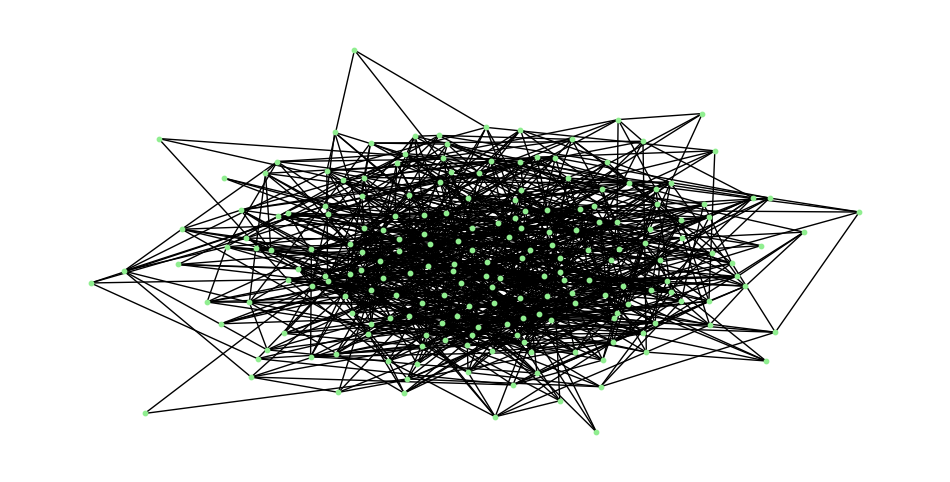

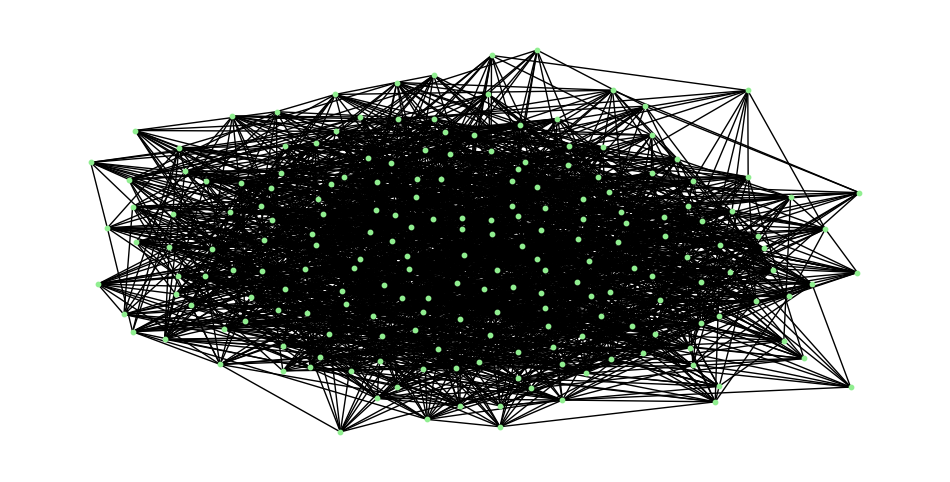

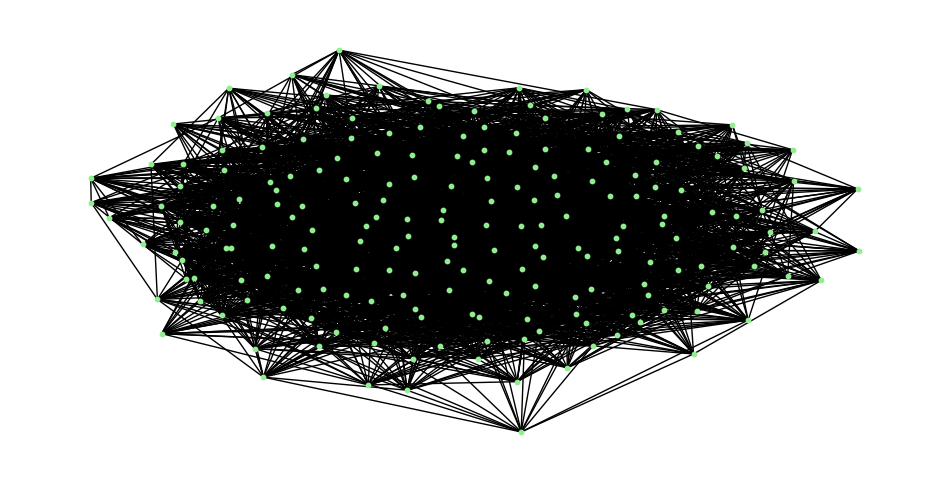

In [13]:
def visualize_er_graph(N, p):
    g = generate_random_graph(N, p)
    while not is_connected(g):
        g = generate_random_graph(N, p)

    plt.figure(figsize=(12, 6))
    plt.axis('off')
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='lightgreen')
    plt.show()

N = 200
p_values = [0.05, 0.1, 0.15]

for p in p_values:
    visualize_er_graph(N, p)

In [14]:
def print_er_statistics(g, p):
    N = g.number_of_nodes()
    observed_degree = sum(dict(g.degree()).values()) / N
    expected_degree = p * (N - 1)

    print(f"Graph with p = {p}:")
    print(f"  Observed average degree: {observed_degree:.2f}")
    print(f"  Expected average degree: {expected_degree:.2f}")
    print()

N = 200
p_values = [0.05, 0.1, 0.15]

for p in p_values:
    g = generate_random_graph(N, p)
    while not is_connected(g):
        g = generate_random_graph(N, p)

    print_er_statistics(g, p)

Graph with p = 0.05:
  Observed average degree: 10.14
  Expected average degree: 9.95

Graph with p = 0.1:
  Observed average degree: 19.62
  Expected average degree: 19.90

Graph with p = 0.15:
  Observed average degree: 29.61
  Expected average degree: 29.85



In [15]:
# Leave as-is or modify if you want

def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

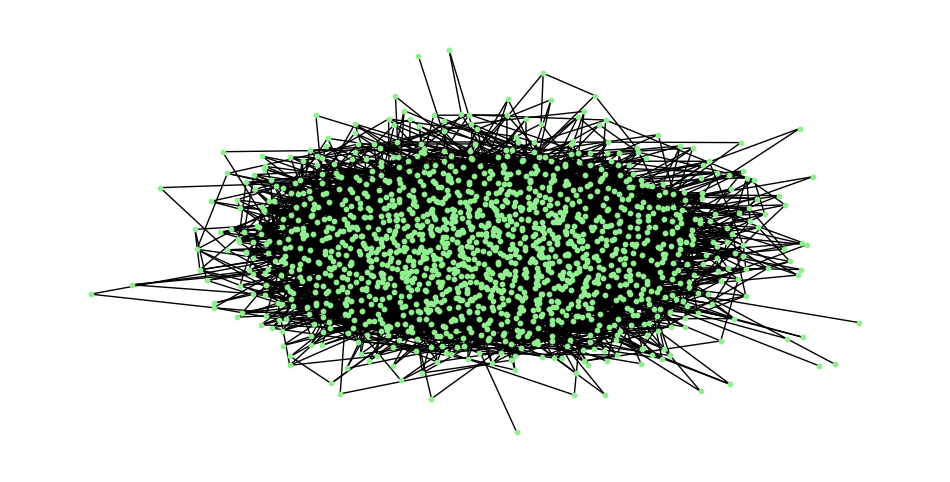

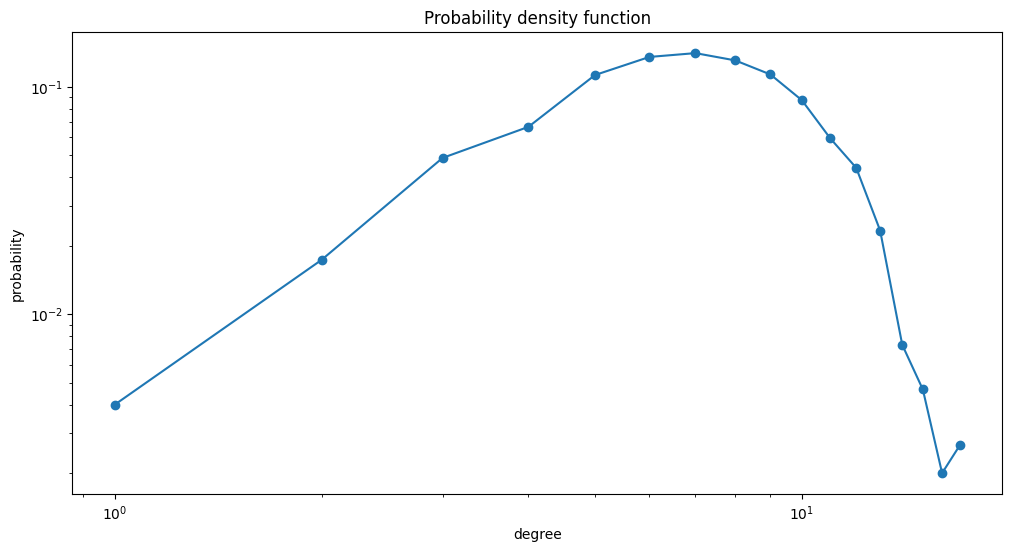

Graph with p = 0.005:
  Observed average degree: 7.48
  Expected average degree: 7.50



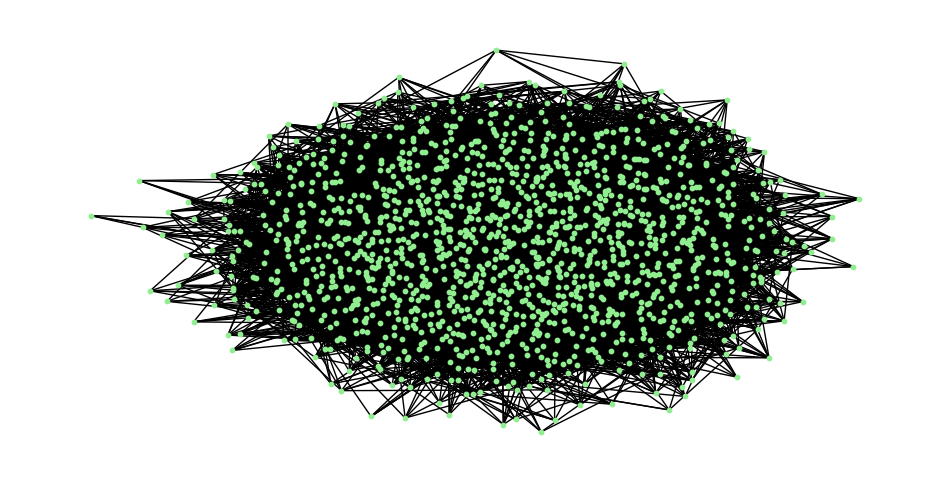

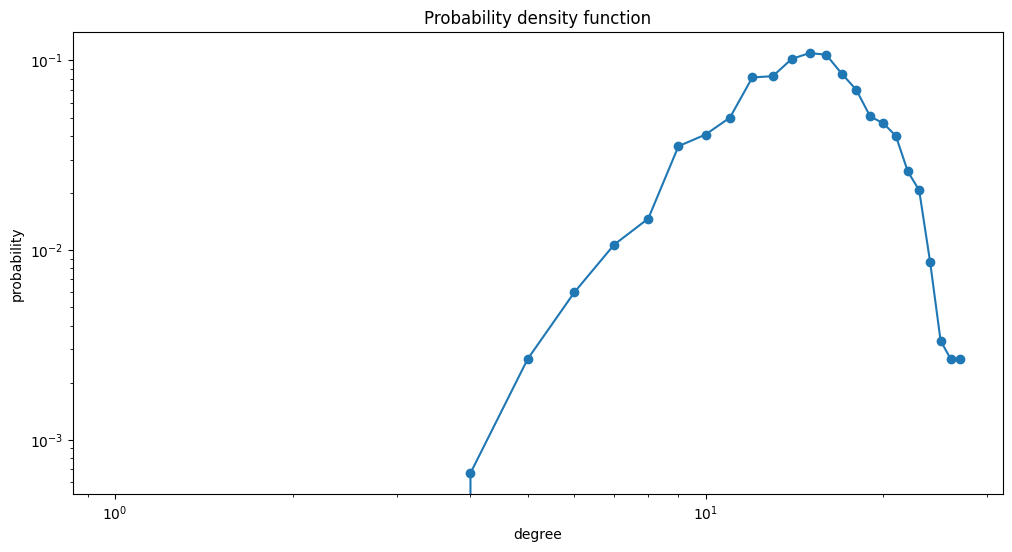

Graph with p = 0.01:
  Observed average degree: 15.28
  Expected average degree: 14.99



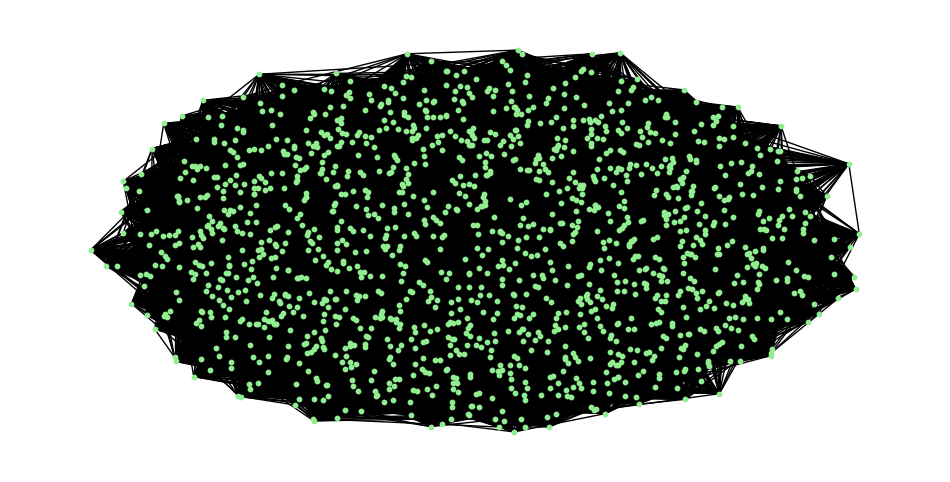

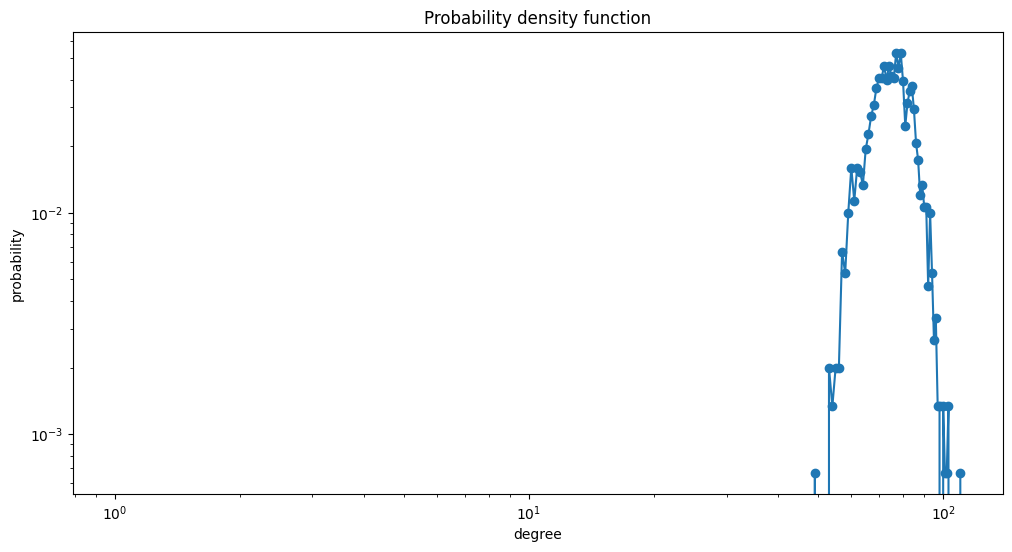

Graph with p = 0.05:
  Observed average degree: 75.59
  Expected average degree: 74.95



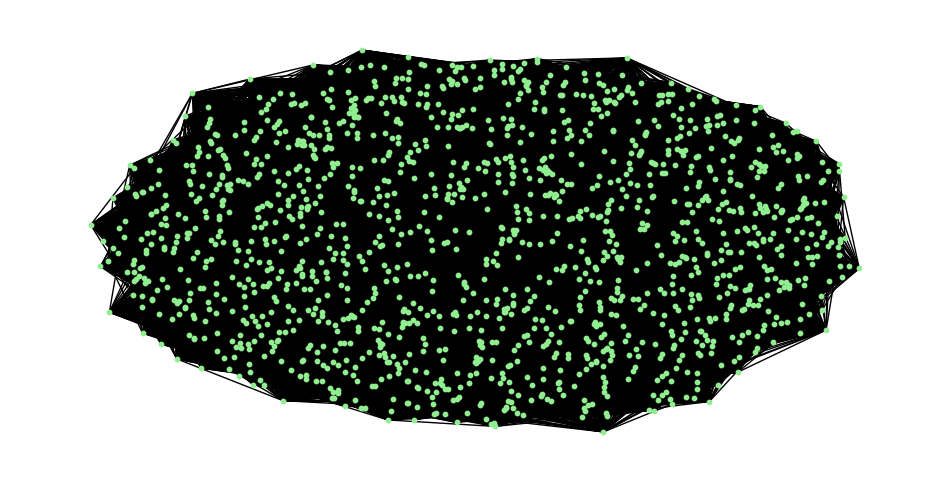

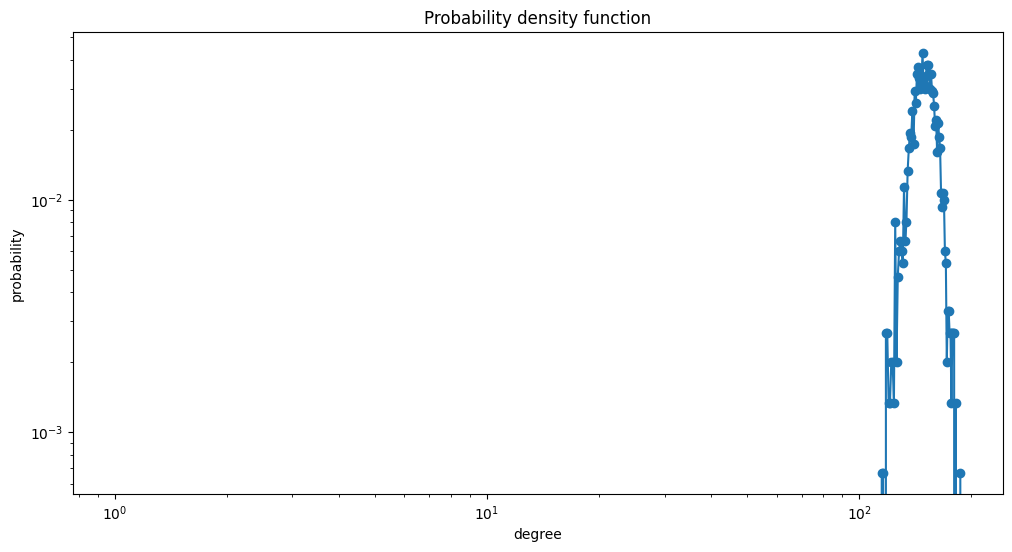

Graph with p = 0.1:
  Observed average degree: 149.91
  Expected average degree: 149.90



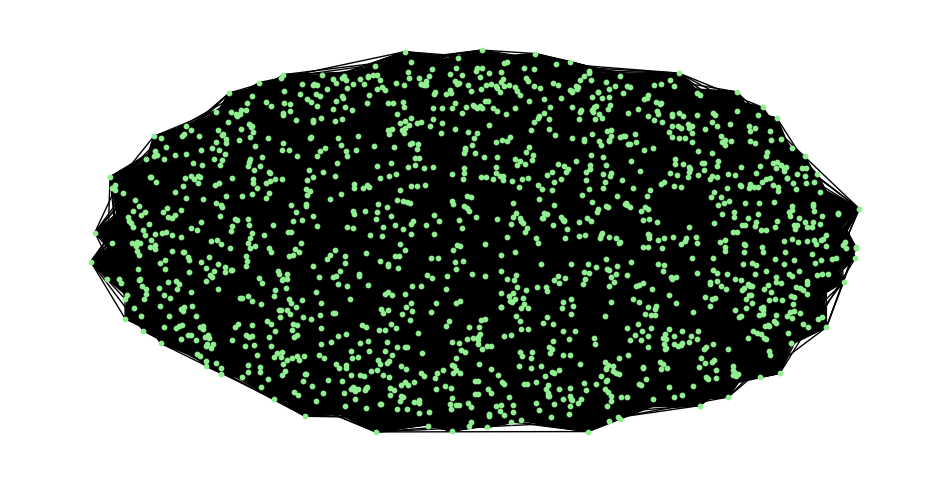

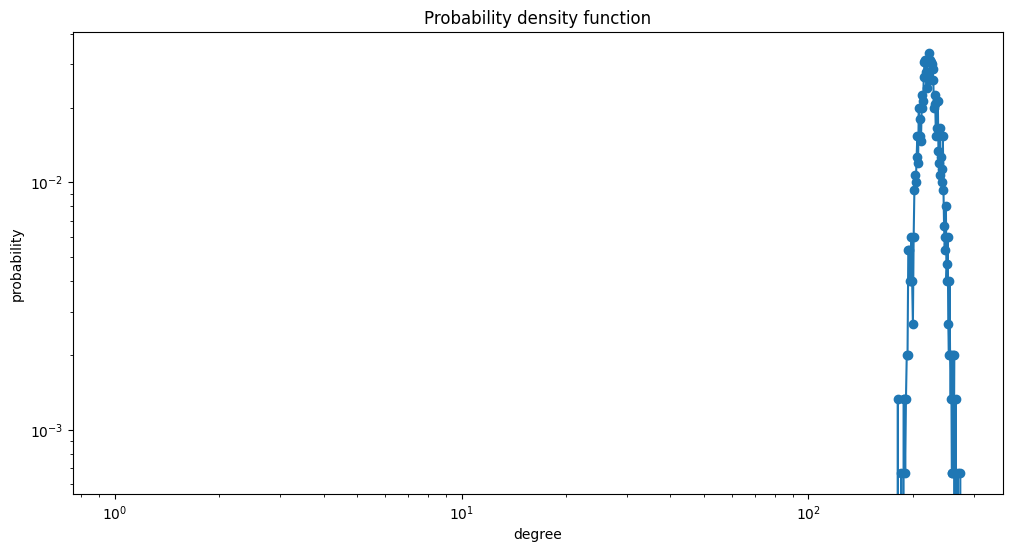

Graph with p = 0.15:
  Observed average degree: 223.65
  Expected average degree: 224.85



In [16]:
N = 1500
p_values = [0.005, 0.01, 0.05, 0.1, 0.15]

for p in p_values:
    g = generate_random_graph(N, p)

    plt.figure(figsize=(12, 6))
    plt.axis('off')
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='lightgreen')
    plt.show()

    plot_degree_distribution(g)

    print_er_statistics(g, p)

<font size="+1" color="red">In the figures above we see that for very low values of p, the graphs are sparse, and many nodes are disconnected, leading to smaller connected components. The degree distribution shows a steep drop-off, meaning that most nodes have very few connections. As the probability p increases, the graphs become denser, and the degree distribution becomes more uniform. A larger fraction of nodes become connected, and the average degree increases. When p is large enough, the graph is almost fully connected, and the degree distribution tends to be more uniform across nodes. However, because of the large N, the network seem to be in general quite dense, but if we reduce the N to a values such as before, where we had N=200, we would see this even more clearly.</font>

# 2. Preferential attachment (BA) generator

In [17]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

In [18]:
# LEAVE AS-IS

trials = 1500
vector = ['a', 'b', 'c']
probabilities = [0.75, 0.13, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)

for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1114 times, expected 1125
Element b was selected 195 times, expected 195
Element c was selected 191 times, expected 180


In [19]:
def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

def select_targets(g, m):
    N = g.number_of_nodes()
    if N < m:
        raise ValueError('Graph has less than m nodes')

    sum_degree = sum(dict(g.degree()).values())
    if sum_degree == 0:
        raise ValueError('Graph has no edges')

    probabilities = []
    for node, degree in g.degree():
        probabilities.append(degree / sum_degree)

    selected = select_with_probability(list(g.nodes), m, probabilities)

    return selected

In [20]:
def generate_preferential_attachment_graph(N, m0, m):
    if m > m0:
        raise ValueError('m cannot be greater than m0')

    # Create an empty graph
    g = nx.Graph()

    # Add initial m0 nodes to the graph
    g.add_nodes_from(range(m0))

    # Create a cycle between the initial m0 nodes
    for i in range(m0):
        g.add_edge(i, (i + 1) % m0)  # Connect node i to node (i+1) mod m0 to form a cycle

    # Add the remaining nodes (from m0 to N-1)
    for u in range(m0, N):
        # Select m target nodes for node u
        targets = select_targets(g, m)

        # Add edges from node u to each of the m targets
        for target in targets:
            g.add_edge(u, target)

    return g

In [21]:
def plot_degree_distribution_loglog(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1, np.max(degree_sequence) + 2), density=True)
    plt.figure(figsize=(12, 6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

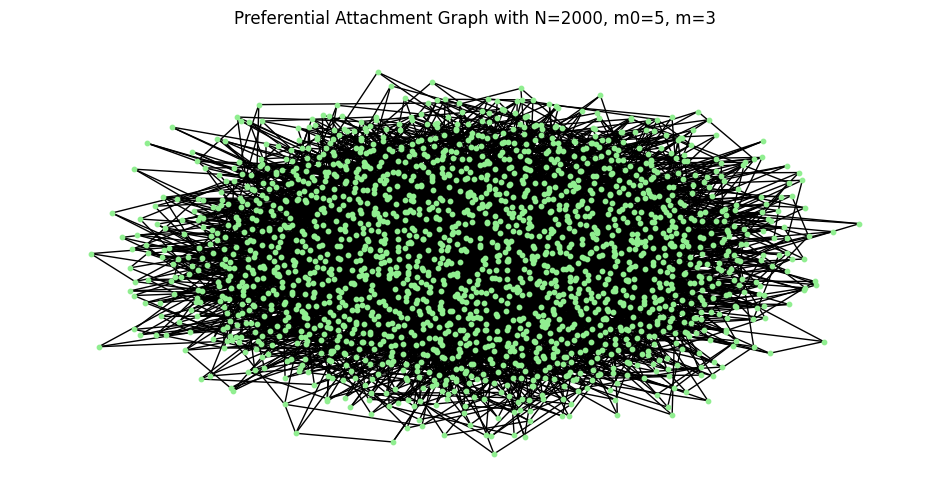

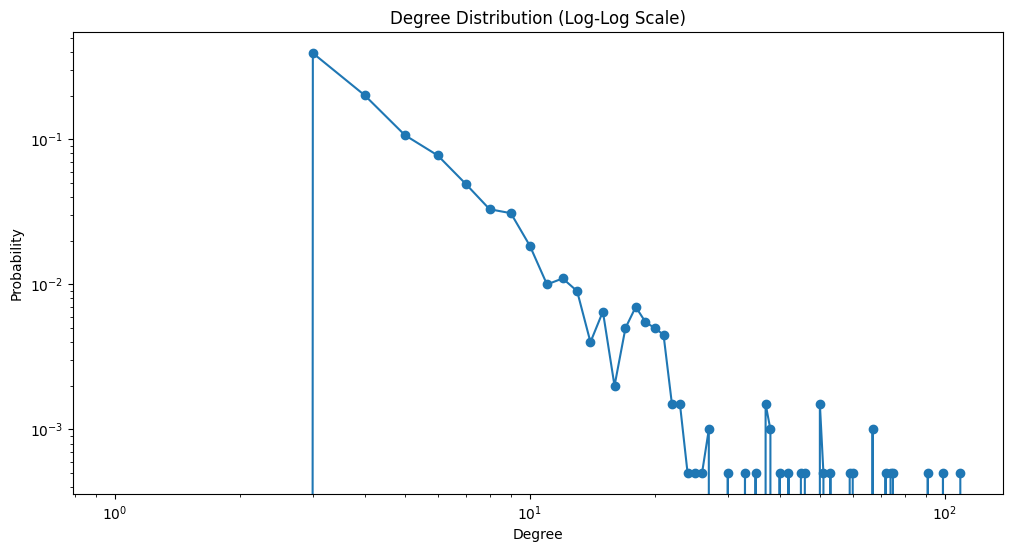

In [22]:
# First graph (small scale)
N1 = 2000
m0_1 = 5
m_1 = 3
g1 = generate_preferential_attachment_graph(N1, m0_1, m_1)

plt.figure(figsize=(12, 6))
plt.axis('off')
pos1 = nx.spring_layout(g1)
nx.draw_networkx(g1, pos1, with_labels=False, node_size=10, node_color='lightgreen')
plt.title(f"Preferential Attachment Graph with N={N1}, m0={m0_1}, m={m_1}")
plt.show()

plot_degree_distribution_loglog(g1)

<font size="+1" color="red">In this graph, the structure follows the preferential attachment model, where new nodes are more likely to attach to nodes with higher degrees. The degree distribution follows a power-law distribution, which is typical of scale-free networks. The graph shows that a small number of nodes have very high degrees, while the majority have low degrees. This is typical in real-world networks such as social media or citation networks.</font>

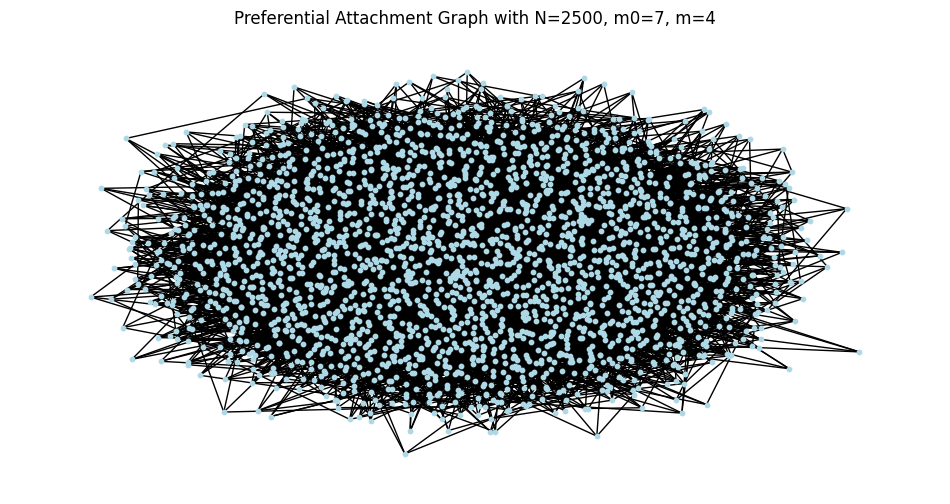

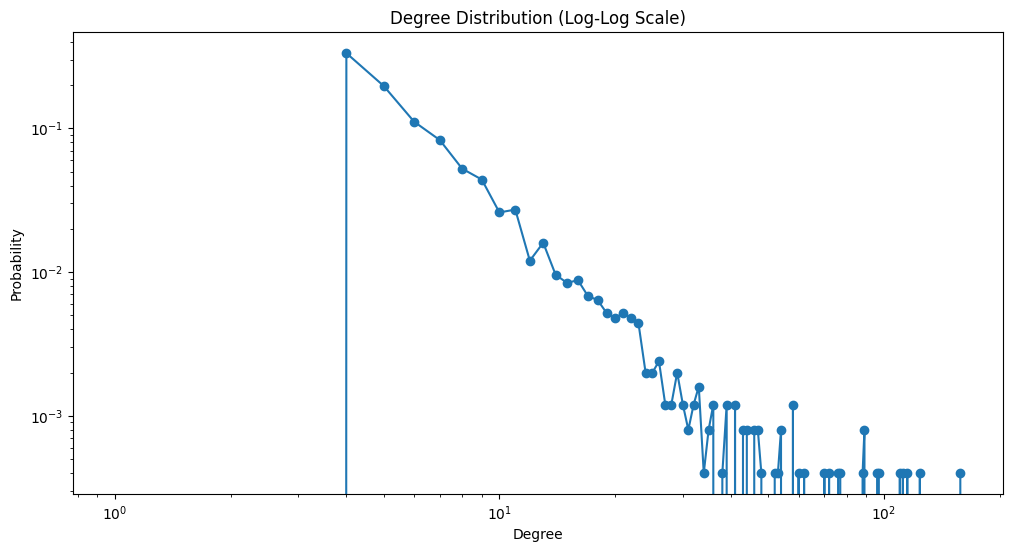

In [23]:
# Second graph (larger scale)
N2 = 2500
m0_2 = 7
m_2 = 4
g2 = generate_preferential_attachment_graph(N2, m0_2, m_2)

plt.figure(figsize=(12, 6))
plt.axis('off')
pos2 = nx.spring_layout(g2)
nx.draw_networkx(g2, pos2, with_labels=False, node_size=10, node_color='lightblue')
plt.title(f"Preferential Attachment Graph with N={N2}, m0={m0_2}, m={m_2}")
plt.show()

plot_degree_distribution_loglog(g2)

<font size="+1" color="red">This graph, with more nodes and a higher number of initial nodes (m0) and edges per new node (m), shows a more connected and denser network. The degree distribution still follows a power law, but with a slightly higher average degree, showing the increased connectivity. The graph has some highly connected nodes, but more nodes are clustered around moderate degrees, showing a more balanced growth compared to the first graph. This structure is still typical of networks like the world wide web, where few websites are highly connected, but most nodes have lower connectivity.

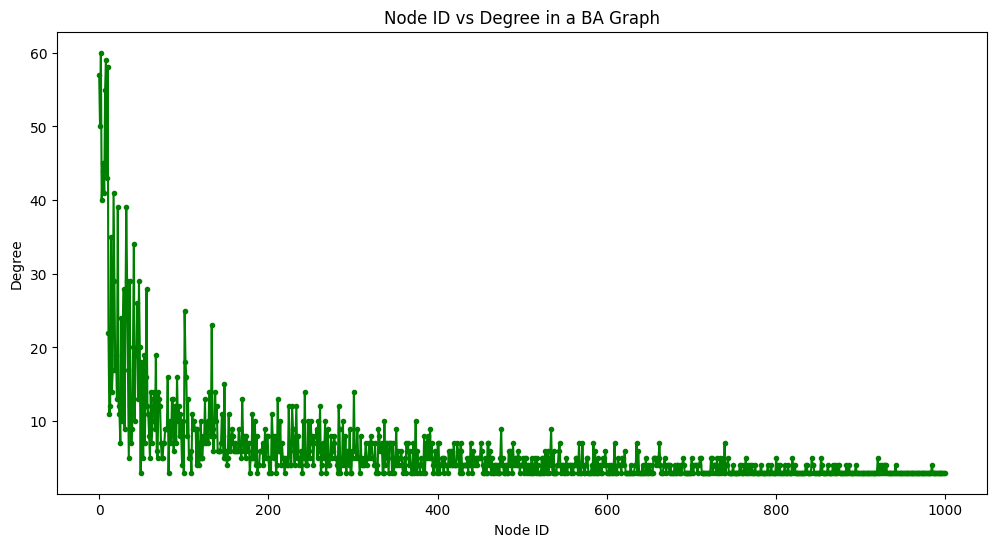

In [24]:
def generate_preferential_attachment_graph(N, m0, m):
    g = nx.Graph()
    g.add_nodes_from(range(m0))

    for i in range(m0):
        g.add_edge(i, (i + 1) % m0)  # Cycle

    for u in range(m0, N):
        targets = select_targets(g, m)
        for target in targets:
            g.add_edge(u, target)

    return g

N = 1000
m0 = 5
m = 3
g = generate_preferential_attachment_graph(N, m0, m)

node_ids = list(g.nodes())
degrees = [g.degree(i) for i in node_ids]

plt.figure(figsize=(12, 6))
plt.plot(node_ids, degrees, 'o-', color='green', markersize=3)
plt.title('Node ID vs Degree in a BA Graph')
plt.xlabel('Node ID')
plt.ylabel('Degree')
plt.show()

<font size="+1" color="red">The plot of this graph shows that a few nodes have very high degrees (hubs) on the left, while most nodes have low degrees on the right. This distribution reflects the preferential attachment process, where early nodes accumulate many connections, while later nodes tend to have fewer. The comes from a scale-free network with a power-law-like degree distribution.</font>

# 3. Fitting of Power Law (extra)

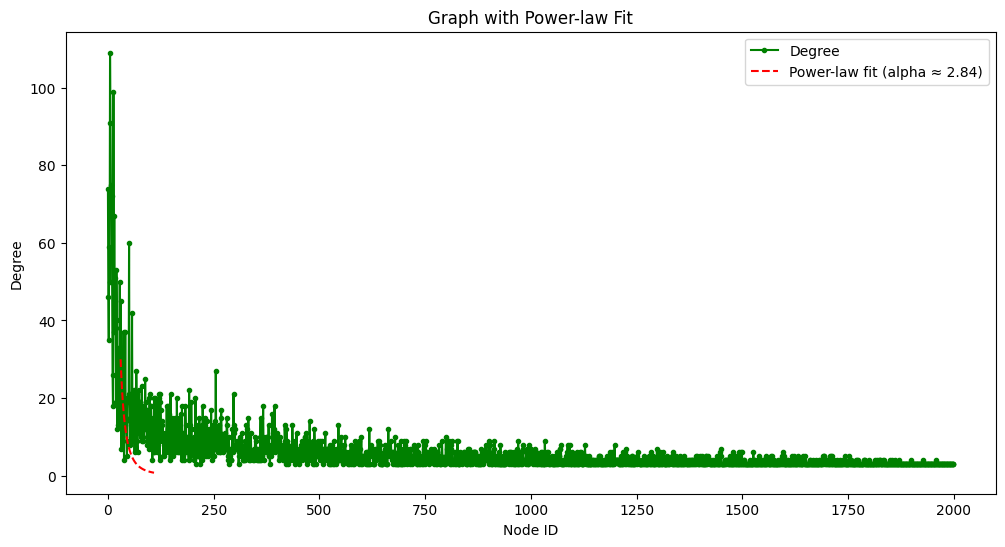

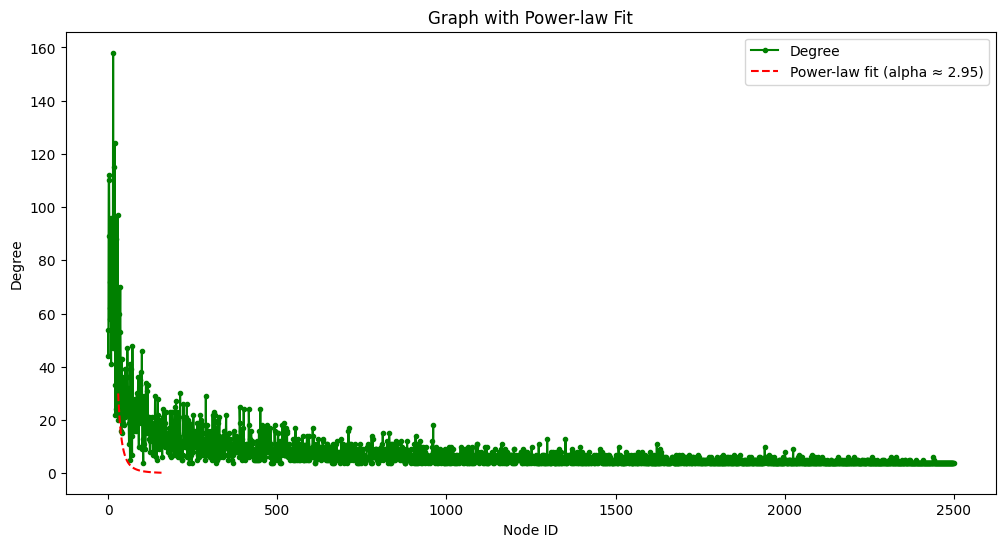

In [25]:
def hill_estimator(degrees, xmin=30):
    degrees_filtered = [deg for deg in degrees if deg >= xmin]
    n = len(degrees_filtered)

    if n > 0:
        alpha = 1 + n / sum(np.log(deg / xmin) for deg in degrees_filtered)
    else:
        alpha = 1

    return alpha, degrees_filtered

def plot_degree_distribution_with_power_law_fit(g, xmin=30):
    degrees = [deg for node, deg in g.degree()]

    alpha, filtered_degrees = hill_estimator(degrees, xmin)

    node_ids = list(range(len(degrees)))
    plt.figure(figsize=(12, 6))
    plt.plot(node_ids, degrees, 'o-', color='green', markersize=3, label="Degree")

    x_vals = np.linspace(xmin, max(degrees), 80)
    y_vals = xmin * (x_vals / xmin) ** (-alpha)

    plt.plot(x_vals, y_vals, 'r--', label=f"Power-law fit (alpha ≈ {alpha:.2f})")

    plt.title('Graph with Power-law Fit')
    plt.xlabel('Node ID')
    plt.ylabel('Degree')
    plt.legend()
    plt.show()

plot_degree_distribution_with_power_law_fit(g1)

plot_degree_distribution_with_power_law_fit(g2)

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>